### Q2 : Use mdtraj in a jupyter notebook to compute the phi and psi dihedral angles from these data. Make a plot of phi vs time and psi vs time.

In [7]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the Trajectory
traj = md.load('../Data/alanine_T300.trr', top = '../Data/alanine_T300.gro')

In [8]:
# compute phi and psi angles
phi_angles = md.compute_phi(traj, periodic=True)
psi_angles = md.compute_psi(traj, periodic=True)

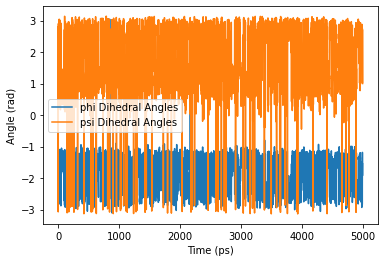

In [15]:
time = traj.time
phi = phi_angles[1][:,0]
psi = psi_angles[1][:,0]

# Make a plot of phi vs time and psi vs time.
fig=plt.figure(1)
plt.plot(time, phi, label= "phi Dihedral Angles")           
plt.plot(time, psi, label= "psi Dihedral Angles")          
plt.legend()                     

# set all labels
plt.xlabel('Time (ps)')
plt.ylabel('Angle (rad)')
plt.savefig('../Figures/phi_psi_time_plot.png', dpi=300)
plt.show()

### Q3: Make a free energy surface in phi, psi space from this data. In otherwords, compute a 2d histogram of the phi, psi data compute F(phi,psi)=-log(histogram), and plot F(phi,psi)-min(F(phi,psi)) nicely labeled, with a colorbar, etc

[[0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 3. 2. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[       inf        inf        inf ...        inf        inf        inf]
 [       inf 3.52636052        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 ...
 [3.52636052        inf 2.42774824 ...        inf        inf        inf]
 [       inf        inf 2.83321334 ...        inf        inf        inf]
 [       inf        inf 3.52636052 ...        inf        inf        inf]]


<ipython-input-30-a478bd81221e>:6: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)


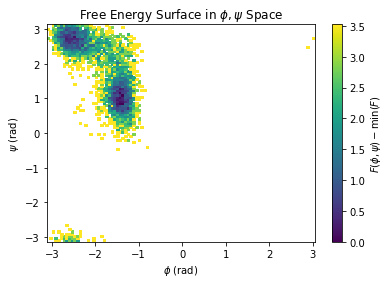

In [30]:
# compute free energy
H, xedges, yedges = np.histogram2d(phi, psi, bins=100)

# print(xedges)
print(H)
H = -np.log(H)
H -= np.min(H)

# Histogram does not follow Cartesian convention,therefore transpose H for visualization purposes.
H = H.T
print(H)

# plot free energy
plt.pcolormesh(xedges, yedges, H)

#plt.imshow(H, extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]])
plt.xlabel('$\phi$ (rad)')
plt.ylabel('$\psi$ (rad)')
plt.title('Free Energy Surface in $\phi, \psi$ Space')
colorbar = plt.colorbar()
colorbar.set_label('$F(\phi, \psi) - \min(F)$')
plt.savefig('../Figures/free energy surface.png', dpi=300)
plt.show()